In [1]:
import numpy as np

In [2]:
import nbimporter

In [3]:
from sklearn.utils import shuffle

In [31]:
import matplotlib.pyplot as plt

In [4]:
from Process_Ecomm import get_data

Importing Jupyter notebook from Process_Ecomm.ipynb


In [5]:
def y2indicator(y, k):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [6]:
X, Y = get_data()

Process_Ecomm.ipynb:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  {


In [7]:
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)

In [8]:
M = 5
D = X.shape[1]
K = len(set(Y))

In [9]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)

In [10]:
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

In [11]:
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

In [12]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims = True)

In [24]:
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

In [14]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis = 1)

In [15]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [16]:
def cross_entropy(T, pY):
    return -np.mean(T * np.log(pY))

In [18]:
train_costs = []
test_costs = []
learning_rate = 0.001

In [28]:
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W2 -= learning_rate * Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate * (pYtrain - Ytrain_ind).sum()
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain * Ztrain)
    W1 -= learning_rate * Xtrain.T.dot(dZ)
    b1 -= learning_rate * dZ.sum(axis = 0)
    if i % 1000 == 0:
        print("Iteration = ", i)
        print("Cost Train = ", ctrain)
        print("Cost Test = ", ctest)
        print("======================================")
    

Iteration =  0
Cost Train =  0.027024059266424864
Cost Test =  0.06925685816780958
Iteration =  1000
Cost Train =  0.026686615325734856
Cost Test =  0.07029734021857802
Iteration =  2000
Cost Train =  0.02639159478415582
Cost Test =  0.07143095735014131
Iteration =  3000
Cost Train =  0.026130234771129867
Cost Test =  0.07264264141625011
Iteration =  4000
Cost Train =  0.025896187346204434
Cost Test =  0.07391509776236856
Iteration =  5000
Cost Train =  0.025684692867356383
Cost Test =  0.07523148318688748
Iteration =  6000
Cost Train =  0.025492088996543906
Cost Test =  0.07657676082628838
Iteration =  7000
Cost Train =  0.025315494304942284
Cost Test =  0.07793822354679802
Iteration =  8000
Cost Train =  0.025152592596809645
Cost Test =  0.07930550132959886
Iteration =  9000
Cost Train =  0.025001478040260983
Cost Test =  0.08067029077490365


In [29]:
print("Final train class. rate = ", classification_rate(Ytrain, predict(pYtrain)))
print("Final test class. rate = ", classification_rate(Ytest, predict(pYtest)))

Final train class. rate =  0.97
Final test class. rate =  0.93


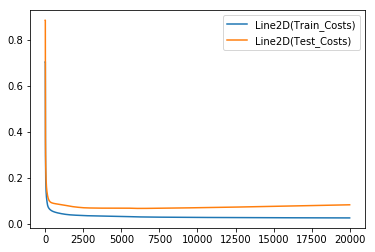

In [32]:
legend1, = plt.plot(train_costs, label = "Train_Costs")
legend2, = plt.plot(test_costs, label = "Test_Costs") 
plt.legend([legend1, legend2])
plt.show()